In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from atlas_topq_2019_23_Limits import *
import scipy

### Contur data:

#### SM Background:

In [2]:
# From HEPData/Table2.csv (PWG+PYTHIA8)
# Corresponds to the theory prediction WIHTOUT NNLO reweighting
theoryBlock = """
From ATLAS_2022_I203774-Theort.yoda:
# xval	 xerr-	 xerr+	 yval	 yerr-	 yerr+	
3.680000e+02	1.300000e+01	1.300000e+01	1.279688e-02	3.288730e-03	2.684552e-04
4.005000e+02	1.950000e+01	1.950000e+01	9.729670e-03	2.573953e-03	2.325265e-04
4.490000e+02	2.900000e+01	2.900000e+01	6.077057e-03	1.592956e-03	2.043380e-04
5.135000e+02	3.550000e+01	3.550000e+01	3.098760e-03	8.270378e-04	1.097391e-04
5.910000e+02	4.200000e+01	4.200000e+01	1.362147e-03	3.663974e-04	5.330028e-05
6.765000e+02	4.350000e+01	4.350000e+01	5.439250e-04	1.298381e-04	8.712391e-06
7.780000e+02	5.800000e+01	5.800000e+01	1.954953e-04	4.865226e-05	1.035270e-05
1.418000e+03	5.820000e+02	5.820000e+02	9.935645e-06	2.420555e-06	1.003932e-06
"""
bgData = np.genfromtxt(theoryBlock.splitlines(),skip_header=2)
bg = bgData[:,-3]
data_obs = bg
bg

array([1.279688e-02, 9.729670e-03, 6.077057e-03, 3.098760e-03,
       1.362147e-03, 5.439250e-04, 1.954953e-04, 9.935645e-06])

#### Signal

In [3]:
sig = np.array([7.11288462e-07,1.72211154e-06,1.71594397e-06,1.18480085e-06, 6.48651071e-07, 2.41585517e-07, 1.15588276e-07, 7.22221478e-10])
uncertainties = np.array([[6.21067227e-07,6.21067227e-07],
 [6.75766093e-07,6.75766093e-07],
 [4.89674276e-07,4.89674276e-07],
 [3.65062816e-07,3.65062816e-07],
 [2.43479023e-07,2.43479023e-07],
 [1.51971494e-07,1.51971494e-07],
 [8.61641516e-08,8.61641516e-08],
 [6.20525704e-09,6.20525704e-09]])

#### Convariance Matrix

In [4]:
covInv = np.array([[9.23602713e+04,-1.84737089e+01,6.04971565e+01,-4.04926203e-01
,-2.72854054e+01,-1.27021025e+02,-1.68443017e+02,3.93985379e+03]
,[-1.84737089e+01,1.50850219e+05,-1.81638504e+01,8.90407931e+01
,-1.71028079e+01,-2.73382676e+02,-2.81024116e+02,-3.75282866e+03]
,[6.04971565e+01,-1.81638504e+01,3.93754933e+05,2.46021562e+01
,3.63495132e+02,-1.80666379e+02,-1.32240637e+02,2.91925783e+04]
,[-4.04926203e-01,8.90407931e+01,2.46021562e+01,1.46003763e+06
,2.88728349e+02,4.33551438e+03,-6.06650523e+02,-3.33230040e+04]
,[-2.72854054e+01,-1.71028079e+01,3.63495132e+02,2.88728349e+02
,7.42976989e+06,5.14237680e+03,4.86766594e+04,-1.76140710e+05]
,[-1.27021025e+02,-2.73382676e+02,-1.80666379e+02,4.33551438e+03
,5.14237680e+03,5.87948383e+07,1.02015507e+05,4.16945092e+06]
,[-1.68443017e+02,-2.81024116e+02,-1.32240637e+02,-6.06650523e+02
,4.86766594e+04,1.02015507e+05,4.14296721e+08,3.27037291e+07]
,[3.93985379e+03,-3.75282866e+03,2.91925783e+04,-3.33230040e+04
,-1.76140710e+05,4.16945092e+06,3.27037291e+07,1.63752262e+11]])
covMatrix_contur = np.linalg.inv(covInv)


#### Chi-Square:

In [5]:
# In this case the SM BG gives the minimum chi-square:
c2min = c2sm = chi2(0.00, sig, bg, data_obs, covMatrix_contur, 0.0)
c2obs = chi2(1.00, sig, bg, data_obs, covMatrix_contur, 0.0)
print('Chi-Square (mu=1):')
print(c2obs)
print('Chi-Square (mu=0):')
print(c2sm)
print('Delta Chi2 = %1.5f' %(c2obs-c2min))

Chi-Square (mu=1):
1.5905973415282747e-05
Chi-Square (mu=0):
0.0
Delta Chi2 = 0.00002


#### CLs (Contur Procedure):

In [6]:
# P-values
pb = 1.0 - scipy.stats.norm.cdf(np.sqrt(c2sm))
psb = 1.0 - scipy.stats.norm.cdf(np.sqrt(c2obs))
print('p-values = ',psb,pb)
CLs_contur = 1.0 - (psb/pb)
print('CLS (contur) = %1.3f' %CLs_contur)
print('Exclusion (contur) = %1.2f%%' %((CLs_contur)*1e2)) # This is the number quoted by Contur!

p-values =  0.4984089309029103 0.5
CLS (contur) = 0.003
Exclusion (contur) = 0.32%


#### CLs (Our Procedure):

In [7]:
# P-values
p_sb = 1.0-scipy.stats.chi2.cdf(c2obs-c2min,df=1)
p_b = 1.0-scipy.stats.chi2.cdf(c2sm-c2min,df=1)
print('p-values = ',p_sb,p_b)
CLs_our = 1-p_sb/(p_b)

print('CLS (our) = %1.3f' %CLs_our)
print('Exclusion (our) = %1.2f%%' %((CLs_our)*1e2)) # This is the number quoted by Contur!

p-values =  0.9968178618058205 1.0
CLS (our) = 0.003
Exclusion (our) = 0.32%


#### CLs values (contur output):

* Data = SM BG (expected):
  * Reporting CLs=0.003182, pval=0.996818, p_sb=0.498409, p_b=0.500000, ts_s_b=0.000016, ts_b=0.000000

## Recasting Data

#### SM Background:

In [8]:
# From ../plotting/distributions/check-dists-ATLAS.ipynb:
smBG_NLO = np.array([1.16790403e-02, 8.82351513e-03, 5.49061028e-03, 2.77538181e-03,
 1.21123052e-03, 4.75281936e-04, 1.68215336e-04, 8.18817615e-06])
data_obs = smBG_NLO

#### Signal

In [9]:
sig_LO = np.array([1.63943741e-06, 1.84706470e-06, 2.20134377e-06, 1.55357415e-06, 8.62291400e-07, 3.96303076e-07, 1.56020505e-07, 1.77168887e-09])
sig_NLO = np.array([2.90611832e-06, 2.98240113e-06, 3.34872682e-06, 2.18939684e-06, 1.06708349e-06, 4.02325502e-07, 1.41776158e-07, 1.03817623e-09])

### Covariance Matrix

In [10]:
covMatrix = np.array([[ 3.81832826e-07,  1.32578400e-09, -1.66344800e-09,
         2.86848800e-12,  3.97951700e-11,  2.33993900e-11,
         4.41265000e-12, -2.61606700e-13],
       [ 1.32578400e-09,  1.54302420e-07,  3.05611000e-10,
        -4.04371100e-10,  1.52182300e-11,  3.08376600e-11,
         4.47543500e-12,  1.50092400e-13],
       [-1.66344800e-09,  3.05611000e-10,  4.51523035e-08,
        -4.28218400e-11, -1.24275800e-10,  7.84641400e-12,
         8.58552700e-13, -4.53217400e-13],
       [ 2.86848800e-12, -4.04371100e-10, -4.28218400e-11,
         1.32802766e-08, -2.65835800e-11, -5.05167500e-11,
         1.00710300e-12,  1.40432400e-13],
       [ 3.97951700e-11,  1.52182300e-11, -1.24275800e-10,
        -2.65835800e-11,  4.50037622e-09, -1.17533100e-11,
        -1.58225900e-11,  1.48251700e-13],
       [ 2.33993900e-11,  3.08376600e-11,  7.84641400e-12,
        -5.05167500e-11, -1.17533100e-11,  1.04776360e-09,
        -4.15263400e-12, -4.32260200e-13],
       [ 4.41265000e-12,  4.47543500e-12,  8.58552700e-13,
         1.00710300e-12, -1.58225900e-11, -4.15263400e-12,
         2.70792527e-10, -4.81976500e-13],
       [-2.61606700e-13,  1.50092400e-13, -4.53217400e-13,
         1.40432400e-13,  1.48251700e-13, -4.32260200e-13,
        -4.81976500e-13,  1.46469095e-12]])

#### Chi-Square:

In [11]:
# In this case the SM BG gives the minimum chi-square:
c2min = c2sm = chi2(0.00, sig_LO, smBG_NLO, data_obs, covMatrix, 0.0)
c2obs = chi2(1.00, sig_LO, smBG_NLO, data_obs, covMatrix, 0.0)
print('Chi-Square (mu=1):')
print(c2obs)
print('Chi-Square (mu=9):')
print(c2sm)
print('Delta Chi2 = %1.3f' %(c2obs-c2min))

Chi-Square (mu=1):
0.0007426734041000067
Chi-Square (mu=9):
0.0
Delta Chi2 = 0.001


#### CLs (Contur Procedure):

In [12]:
# P-values
p_b = 1.0 - scipy.stats.norm.cdf(np.sqrt(c2sm))
p_sb = 1.0 - scipy.stats.norm.cdf(np.sqrt(c2obs))
print('p-values = ',p_sb,p_b)
CLs_contur = 1.0 - (p_sb/p_b)
print('CLS (contur) = %1.3f' %CLs_contur)
print('Exclusion = %1.2f%%' %((CLs_contur)*1e2)) # This is the number quoted by Contur!

p-values =  0.48912935663965507 0.5
CLS (contur) = 0.022
Exclusion = 2.17%


#### CLs (Our Procedure):

In [13]:
# In this case the SM BG gives the minimum chi-square:
p_sb = 1.0-scipy.stats.chi2.cdf(c2obs-c2min,df=1)
p_b = 1.0-scipy.stats.chi2.cdf(c2sm-c2min,df=1)
print('p-values = ',p_sb,p_b)
CLs = 1.0 - p_sb/(p_b)
# CLs = 0.05 should give the 95%C.L. exclusion
print('CLs = %1.3f' %(CLs))
print('Exclusion = %1.2f%%' %((CLs)*1e2)) # This is the number quoted by Contur!

p-values =  0.97825871327931 1.0
CLs = 0.022
Exclusion = 2.17%


## Plots

In [14]:
atlas_bins = np.array([355.0,381.0,420.0,478.0,549.0,633.0,
                        720.0,836.0,2000.0])

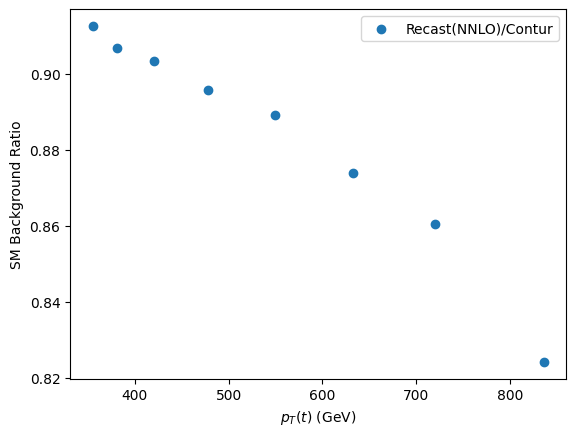

In [15]:
plt.scatter(atlas_bins[:-1],smBG_NLO/bg,label='Recast(NNLO)/Contur')
plt.xlabel(r'$p_T(t)$ (GeV)')
plt.ylabel(r'SM Background Ratio')
plt.legend()
plt.show()

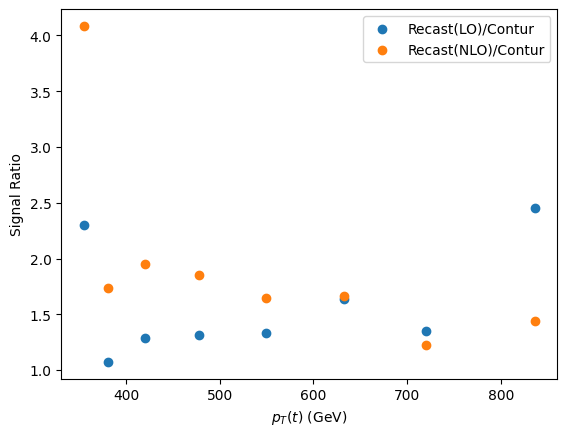

In [16]:
plt.scatter(atlas_bins[:-1],sig_LO/sig,label='Recast(LO)/Contur')
plt.scatter(atlas_bins[:-1],sig_NLO/sig,label='Recast(NLO)/Contur')
plt.xlabel(r'$p_T(t)$ (GeV)')
plt.ylabel(r'Signal Ratio')
plt.legend()
plt.show()